<a href="https://colab.research.google.com/github/AliKhodarahmy/machinelearning2023/blob/main/miniproject/2/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Q1**

In [ ]:
#https://drive.google.com/file/d/1ooAD-0ufnjMZHJq3U5YJ-5BX24YGupeX/view?usp=sharing

In [96]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1ooAD-0ufnjMZHJq3U5YJ-5BX24YGupeX

Downloading...
From: https://drive.google.com/uc?id=1ooAD-0ufnjMZHJq3U5YJ-5BX24YGupeX
To: /content/Perceptron.csv
100% 17.3k/17.3k [00:00<00:00, 34.1MB/s]


In [102]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Load the dataset
data = pd.read_csv('/content/Perceptron.csv')

# Separate features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Transforming y values from {-1, 1} to {0, 1}
y = np.where(y == -1, 0, 1)

# Splitting the dataset into the Training set and Test set (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320,), (80,))

In [113]:
def bce(y, y_hat):
    return np.mean(-(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))

def sigmoid(x):
    return 1/(1+np.exp(-x))

def accuracy(y, y_hat, t=0.4):
    y_hat = np.where(y_hat<t,0,1)
    acc = np.sum(y==y_hat)/len(y)
    return acc

In [106]:
class Neuron:

    def __init__(self, in_features, af=None, loss_fn=bce, n_iter=500, eta=0.1, verbose=True):
        self.in_features = in_features
        self.w = np.random.randn(in_features, 1)
        self.b = np.random.randn()
        self.af = af
        self.loss_fn = loss_fn
        self.loss_hist = []
        self.w_grad, self.b_grad = None, None
        self.n_iter = n_iter
        self.eta = eta
        self.verbose = verbose

    def predict(self, x):
        y_hat = x @ self.w + self.b
        y_hat = y_hat if self.af is None else self.af(y_hat)
        return y_hat

    def fit(self, x, y):
        for i in range(self.n_iter):
            y_hat = self.predict(x)
            loss = self.loss_fn(y, y_hat)
            self.loss_hist.append(loss)
            self.gradient(x, y, y_hat)
            self.gradient_descent()
            if self.verbose & (i % 10 == 0):
                print(f'Iter={i}, Loss={loss:.4}')

    def gradient(self, x, y, y_hat):
        self.w_grad = (x.T @ (y_hat - y)) / len(y)
        self.b_grad = (y_hat - y).mean()

    def gradient_descent(self):
        self.w -= self.eta * self.w_grad
        self.b -= self.eta * self.b_grad

    def __repr__(self):
        return f'Neuron({self.in_features}, {self.af.__name__})'

    def parameters(self):
        return {'w': self.w, 'b': self.b}

In [118]:
neuron = Neuron(in_features=2, af=sigmoid, loss_fn=bce, n_iter=200, eta=0.02, verbose=True)
neuron.fit(X_train, y_train[:, None])
neuron.parameters()

Iter=0, Loss=0.5237
Iter=10, Loss=0.4679
Iter=20, Loss=0.4214
Iter=30, Loss=0.3824
Iter=40, Loss=0.3493
Iter=50, Loss=0.3211
Iter=60, Loss=0.2969
Iter=70, Loss=0.2758
Iter=80, Loss=0.2574
Iter=90, Loss=0.2412
Iter=100, Loss=0.2268
Iter=110, Loss=0.2141
Iter=120, Loss=0.2026
Iter=130, Loss=0.1923
Iter=140, Loss=0.183
Iter=150, Loss=0.1745
Iter=160, Loss=0.1668
Iter=170, Loss=0.1598
Iter=180, Loss=0.1533
Iter=190, Loss=0.1473


{'w': array([[-2.09932521],
        [-0.00380932]]),
 'b': 0.15371230454075216}

In [119]:
y_hat = neuron.predict(X_test)
t1 = accuracy(y_test[:, None], y_hat, t=0.5)
print (t1)
t2 = accuracy(y_test[:, None], y_hat, t=0.6)
print (t2)

y_hat[:, 0], y_test

1.0
0.9875


(array([0.26495802, 0.7909286 , 0.97269041, 0.89171642, 0.18970801,
        0.14208411, 0.26450182, 0.95388897, 0.70897528, 0.12447864,
        0.95219378, 0.87836766, 0.6650151 , 0.37855848, 0.1582354 ,
        0.95569843, 0.96102987, 0.81505317, 0.92176587, 0.15529041,
        0.19136479, 0.12357823, 0.95151571, 0.04915493, 0.07550624,
        0.23601319, 0.21878407, 0.01067706, 0.78107456, 0.02736237,
        0.19468678, 0.27076445, 0.86476825, 0.91143212, 0.09757931,
        0.9724753 , 0.93817198, 0.69906535, 0.89994027, 0.1604151 ,
        0.80432767, 0.31665607, 0.11531663, 0.13971848, 0.83147691,
        0.25814903, 0.20430259, 0.19185876, 0.12335572, 0.56404379,
        0.70320458, 0.0467613 , 0.23010372, 0.1827398 , 0.95439162,
        0.91666956, 0.09142507, 0.28833893, 0.39286779, 0.1656994 ,
        0.05570339, 0.09922466, 0.74849332, 0.14723707, 0.88285429,
        0.94913566, 0.34755529, 0.0493243 , 0.83931502, 0.07894035,
        0.0734842 , 0.10910727, 0.08542822, 0.15

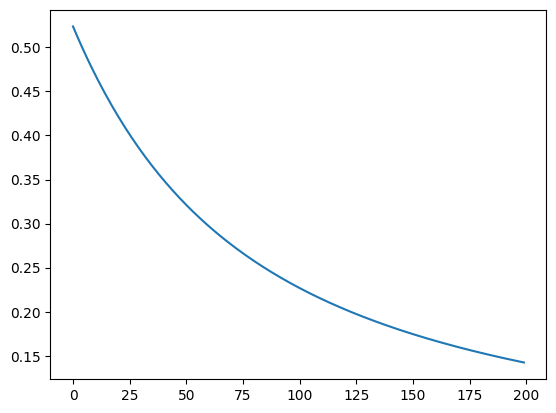

In [120]:
plt.plot(neuron.loss_hist)

<Axes: >

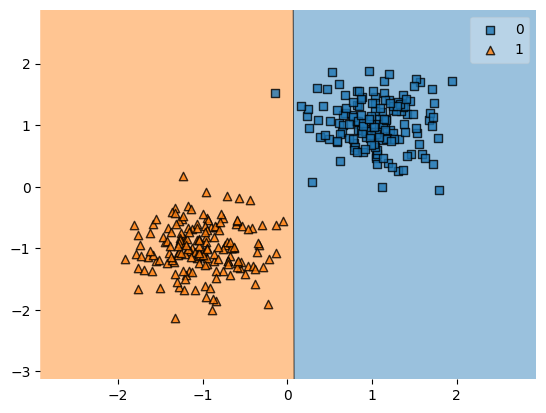

In [121]:
plot_decision_regions(X_train, y_train.astype(np.int_), clf=neuron)

#**end of Q1**

In [114]:
#import library
import numpy as np

In [98]:
#define muculloch pitts
class McCulloch_Pitts_neuron():

  def __init__(self , weights , threshold):
    self.weights = weights    #define weights
    self.threshold = threshold    #define threshold

  def model(self , x):
    #define model with threshold
    if self.weights @ x >= self.threshold:
        return 1
    else:
        return 0

In [138]:
#define model for dataset
def DFA(state , input):
  neur1 = McCulloch_Pitts_neuron([1, 1, 1 ,1] ,4 )
  neur2 = McCulloch_Pitts_neuron([3,-1  , 3,-1] ,5 )
  neur31 = McCulloch_Pitts_neuron([-1, 3 , 3 ,-1] , 5)
  neur32 = McCulloch_Pitts_neuron([3,-1  ,-1  ,3] ,5 )
  neur4 = McCulloch_Pitts_neuron([0,1 ,0 ,1] ,2)

  z1 = neur1.model(np.array([state[0], state[1] , state[2] , input]))
  z2 = neur2.model(np.array([state[0], state[1] , state[2] , input]))
  z3 = np.where(neur31.model(np.array([state[0], state[1] , state[2] , input]))+neur32.model(np.array([state[0], state[1] , state[2] , input])) == 0, 0, 1)
  #z3 = neur31.model(np.array([state[0], state[1] , input]))+neur32.model(np.array([state[0], state[1] , input]))
  z4 = neur4.model(np.array([state[0], state[1] , state[2] , input]))
  # 4 bit output
  # return str(z1) + str(z2) + str(z3) + str(z4)
  return list([z1,z2,z3,z4])

In [143]:
import itertools
# inputs
state_b = [1, 0]
state = list(itertools.product(state_b, state_b,state_b))
input = [1, 0]
X = list(itertools.product(state, input))

print('state: ', state)

print('\n')

print('X: ', X)

print('\n')

for i in X:
    res = DFA(i[0],i[1])
    print("first input as A = ", str(i[0][0]) + str(" ")+str(i[0][1]), "in second input as B = ",str(i[0][2])+ str(" ")+
          str(i[1]), " is equal to = ", str(res[0]) + str(" ")+str(res[1])+ str(" ")+str(res[2])+ str(" ")+str(res[3]))

state:  [(1, 1, 1), (1, 1, 0), (1, 0, 1), (1, 0, 0), (0, 1, 1), (0, 1, 0), (0, 0, 1), (0, 0, 0)]


X:  [((1, 1, 1), 1), ((1, 1, 1), 0), ((1, 1, 0), 1), ((1, 1, 0), 0), ((1, 0, 1), 1), ((1, 0, 1), 0), ((1, 0, 0), 1), ((1, 0, 0), 0), ((0, 1, 1), 1), ((0, 1, 1), 0), ((0, 1, 0), 1), ((0, 1, 0), 0), ((0, 0, 1), 1), ((0, 0, 1), 0), ((0, 0, 0), 1), ((0, 0, 0), 0)]


first input as A =  1 1 in second input as B =  1 1  is equal to =  1 0 0 1
first input as A =  1 1 in second input as B =  1 0  is equal to =  0 1 1 0
first input as A =  1 1 in second input as B =  0 1  is equal to =  0 0 1 1
first input as A =  1 1 in second input as B =  0 0  is equal to =  0 0 0 0
first input as A =  1 0 in second input as B =  1 1  is equal to =  0 1 1 0
first input as A =  1 0 in second input as B =  1 0  is equal to =  0 1 0 0
first input as A =  1 0 in second input as B =  0 1  is equal to =  0 0 1 0
first input as A =  1 0 in second input as B =  0 0  is equal to =  0 0 0 0
first input as A =  0 1 in sec

In [110]:
import itertools
# inputs
state_b = [1, 0]
state = list(itertools.product(state_b, state_b))
input = [1, 0]
X = list(itertools.product(state, input))
print (X)
for i in X:
    res = DFA(i[0],i[1])
    print("DFA with current state as", str(i[0][0]) + str(" ")+str(i[0][1]), "with input as",
          str(i[1]), "goes to next state ", str(res[0]) + str(" ")+str(res[1]), " with acceptance " , str(res[2]))

[((1, 1), 1), ((1, 1), 0), ((1, 0), 1), ((1, 0), 0), ((0, 1), 1), ((0, 1), 0), ((0, 0), 1), ((0, 0), 0)]
DFA with current state as 1 1 with input as 1 goes to next state  1 1  with acceptance  1
DFA with current state as 1 1 with input as 0 goes to next state  1 1  with acceptance  1
DFA with current state as 1 0 with input as 1 goes to next state  0 1  with acceptance  0
DFA with current state as 1 0 with input as 0 goes to next state  1 1  with acceptance  1
DFA with current state as 0 1 with input as 1 goes to next state  0 1  with acceptance  0
DFA with current state as 0 1 with input as 0 goes to next state  1 0  with acceptance  0
DFA with current state as 0 0 with input as 1 goes to next state  0 1  with acceptance  0
DFA with current state as 0 0 with input as 0 goes to next state  0 0  with acceptance  0


In [ ]:
print("DFA with current state as", str(i[0][0]) + str(" ")+str(i[0][1])+ str(" ")+str(i[0][2]), "with input as",
          str(i[1]), "goes to next state ", str(res[0]) + str(" ")+str(res[1]), " with acceptance " , str(res[2]))

# **Q3**

In [1]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
!unzip PersianData.zip

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
To: /content/PersianData.zip
100% 7.46k/7.46k [00:00<00:00, 13.9MB/s]
Archive:  PersianData.zip
  inflating: 1.jpg                   
  inflating: 2.jpg                   
  inflating: 3.jpg                   
  inflating: 4.jpg                   
  inflating: 5.jpg                   


In [17]:
from PIL import Image, ImageDraw
import random

def convertImageToBinary(path):
    """
    Convert an image to a binary representation based on pixel intensity.

    Args:
        path (str): The file path to the input image.

    Returns:
        list: A binary representation of the image where white is represented by -1 and black is represented by 1.
    """
    # Open the image file.
    image = Image.open(path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for intensity thresholding.
    factor = 100

    # Initialize an empty list to store the binary representation.
    binary_representation = []

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Extract the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0]
            green = pix[i, j][1]
            blue = pix[i, j][2]

            # Calculate the total intensity of the pixel.
            total_intensity = red + green + blue

            # Determine whether the pixel should be white or black based on the intensity.
            if total_intensity > (((255 + factor) // 2) * 3):
                red, green, blue = 255, 255, 255  # White pixel
                binary_representation.append(-1)
            else:
                red, green, blue = 0, 0, 0  # Black pixel
                binary_representation.append(1)

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Clean up the drawing tool.
    del draw


    import pandas as pd
    # Convert the binary representation to a DataFrame
    df = pd.DataFrame({'BinaryRepresentation': binary_representation})

    # Save the DataFrame to an Excel file
    excel_output_path = "/content/binary_representation.xlsx"
    df.to_excel(excel_output_path, index=False)

    # Return the binary representation of the image.
    return binary_representation

In [21]:
binary_representation1 = convertImageToBinary("/content/1.jpg")
binary_representation2 = convertImageToBinary("/content/2.jpg")
binary_representation3 = convertImageToBinary("/content/3.jpg")
binary_representation4 = convertImageToBinary("/content/4.jpg")
binary_representation5 = convertImageToBinary("/content/5.jpg")

9216

In [43]:
from PIL import Image, ImageDraw
import random

def generateNoisyImages():
    # List of image file paths
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"/content/noisy{i}.jpg"
        getNoisyBinaryImage(image_path, noisy_image_path)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")

def getNoisyBinaryImage(input_path, output_path):
    """
    Add noise to an image and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the noisy image.
    """
    # Open the input image.
    image = Image.open(input_path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for introducing noise.
    noise_factor = 100

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Generate a random noise value within the specified factor.
            rand = random.randint(-noise_factor, noise_factor)

            # Add the noise to the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0] + rand
            green = pix[i, j][1] + rand
            blue = pix[i, j][2] + rand

            # Ensure that RGB values stay within the valid range (0-255).
            if red < 0:
                red = 0
            if green < 0:
                green = 0
            if blue < 0:
                blue = 0
            if red > 255:
                red = 255
            if green > 255:
                green = 255
            if blue > 255:
                blue = 255

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Save the noisy image as a file.
    image.save(output_path, "JPEG")

    # Clean up the drawing tool.
    del draw

# Generate noisy images and save them
generateNoisyImages()


Noisy image for /content/1.jpg generated and saved as /content/noisy1.jpg
Noisy image for /content/2.jpg generated and saved as /content/noisy2.jpg
Noisy image for /content/3.jpg generated and saved as /content/noisy3.jpg
Noisy image for /content/4.jpg generated and saved as /content/noisy4.jpg
Noisy image for /content/5.jpg generated and saved as /content/noisy5.jpg


# **3**

In [57]:
from PIL import Image, ImageDraw
import random
import numpy as np

def generateMissingPointImages(missing_point_percentage):
    # List of image file paths
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        missing_point_image_path = f"/content/missing_point{i}.jpg"
        getMissingPointImage(image_path, missing_point_image_path, missing_point_percentage)
        print(f"Missing point image for {image_path} generated and saved as {missing_point_image_path}")

def getMissingPointImage(input_path, output_path, missing_point_percentage):
    """
    Generate missing point outputs from the input data.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the image with missing points.
        missing_point_percentage (float): The percentage of points to remove.
    """
    # Open the input image.
    image = Image.open(input_path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Calculate the number of points to remove based on the percentage.
    num_points_to_remove = int(missing_point_percentage * (width * height))

    # Randomly choose points to remove.
    for _ in range(num_points_to_remove):
        i = random.randint(0, width - 1)
        j = random.randint(0, height - 1)
        draw.point((i, j), fill=(255, 255, 255))  # Fill with white to represent missing point

    # Save the image with missing points as a file.
    image.save(output_path, "JPEG")

    # Clean up the drawing tool.
    del draw

# Generate images with missing points and save them
missing_point_percentage = 10  # Adjust this value as needed
generateMissingPointImages(missing_point_percentage)


Missing point image for /content/1.jpg generated and saved as /content/missing_point1.jpg
Missing point image for /content/2.jpg generated and saved as /content/missing_point2.jpg
Missing point image for /content/3.jpg generated and saved as /content/missing_point3.jpg
Missing point image for /content/4.jpg generated and saved as /content/missing_point4.jpg
Missing point image for /content/5.jpg generated and saved as /content/missing_point5.jpg


# **2**

missing_point1.jpg
Output Vectors Table:
0.008625 0.008428 0.008265 0.008648 0.008601 
0.000000 0.000000 0.000000 0.000000 0.000000 
0.000000 0.000000 0.000000 0.000000 0.000000 
Last Output Vector: 5.0123999999999895e-16 2.1756000000000062e-16 0 5.343599999999998e-16 4.6668e-16
The highest positive output value is associated with class 4


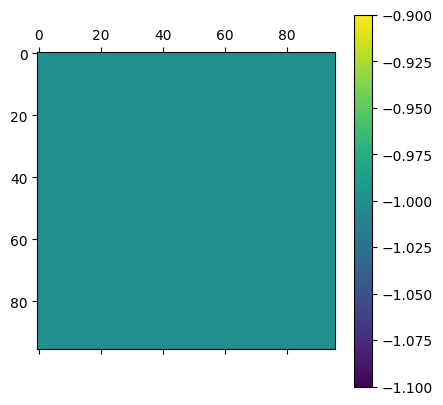

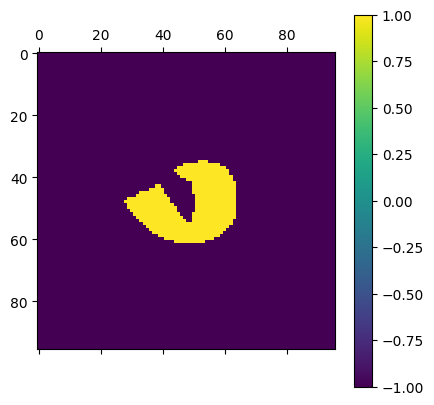

In [59]:
from pylab import *
from math import sqrt
import matplotlib.pyplot as plt
import os

# Define the path to the input image
IMAGE_PATH = "/content/missing_point1.jpg"

def show(matrix):
    """
    Display a matrix in a formatted manner.

    Args:
        matrix (list of lists): The matrix to be displayed.
    """
    for j in range(len(matrix)):
        for i in range(len(matrix[0])):
            print("{:3f}".format(matrix[j][i]), end=" ")
        print(sep="")

def change(vector, a, b):
    """
    Transform a vector into a matrix of specified dimensions.

    Args:
        vector (list): The vector to be transformed.
        a (int): The number of columns in the resulting matrix.
        b (int): The number of rows in the resulting matrix.

    Returns:
        list of lists: The transformed matrix.
    """
    matrix = [[0 for j in range(a)] for i in range(b)]
    k = 0
    j = 0
    while k < b:
        i = 0
        while i < a:
            matrix[k][i] = vector[j]
            j += 1
            i += 1
        k += 1
    return matrix

def product(matrix, vector, T):
    """
    Multiply a matrix by a vector.

    Args:
        matrix (list of lists): The matrix to be multiplied.
        vector (list): The vector to be multiplied.
        T (float): The threshold parameter for the activation function.

    Returns:
        list: The resulting vector after multiplication.
    """
    result_vector = []
    for i in range(len(matrix)):
        x = 0
        for j in range(len(vector)):
            x = x + matrix[i][j] * vector[j]
        result_vector.append((x + T))
    return result_vector

def action(vector, T, Emax):
    """
    Activation function to process a vector.

    Args:
        vector (list): The input vector to be processed.
        T (float): The threshold parameter for the activation function.
        Emax (float): The maximum allowable value for the difference in output vectors between consecutive iterations.

    Returns:
        list: The output vector after activation.
    """
    result_vector = []
    for value in vector:
        if value <= 0:
            result_vector.append(0)
        elif 0 < value <= T:
            result_vector.append(Emax * value)
        elif value > T:
            result_vector.append(T)
    return result_vector

def mysum(vector, j):
    """
    Calculate the sum of vector values excluding the element at index j.

    Args:
        vector (list): The input vector.
        j (int): The index of the element to be excluded from the sum.

    Returns:
        float: The sum of vector values with the element at index j excluded.
    """
    p = 0
    total_sum = 0
    while p < len(vector):
        if p != j:
            total_sum = total_sum + vector[p]
        p += 1
    return total_sum

def norm(vector, p):
    """
    Calculate the difference between two vectors and compute the norm of the resulting vector.

    Args:
        vector (list): The first vector.
        p (list): The second vector for subtraction.

    Returns:
        float: The Euclidean norm of the difference between the two vectors.
    """
    difference = []
    for i in range(len(vector)):
        difference.append(vector[i] - p[i])
    sum = 0
    for element in difference:
        sum += element * element
    return sqrt(sum)

# List of paths to example images
path = [
    '/content/1.jpg',
    '/content/2.jpg',
    '/content/3.jpg',
    '/content/4.jpg',
    '/content/5.jpg',
]

x = []  # Binary representations of example images
print(os.path.basename(IMAGE_PATH))

# Convert and store binary representations of example images
for i in path:
    x.append(convertImageToBinary(i))

y = convertImageToBinary(IMAGE_PATH)  # Binary representation of the input image
entr = y
k = len(x)  # Number of example images
a = 96  # Number of columns in the transformed matrix
b = 96  # Number of rows in the transformed matrix
entr = y
q = change(y, a, b)  # Transformation of input image into a matrix
plt.matshow(q)
plt.colorbar()

m = len(x[0])
w = [[(x[i][j]) / 2 for j in range(m)] for i in range(k)]  # Weight matrix
T = m / 2  # Activation function threshold parameter
e = round(1 / len(x), 1)
E = [[0 for j in range(k)] for i in range(k)]  # Synaptic connection matrix
Emax = 0.000001  # Maximum allowable difference norm between output vectors in consecutive iterations
U = 1 / Emax

# Set values for the synaptic connection matrix
for i in range(k):
    for j in range(k):
        if j == i:
            E[i][j] = 1.0
        else:
            E[i][j] = -e

s = [product(w, y, T)]  # Initial output vector
p = action(s[0], U, Emax)
y = [p]
i = 0
j = []
p = [0 for j in range(len(s[0]))]

# Iterate until the difference norm is less than Emax
while norm(y[i], p) >= Emax:
    s.append([0 for j in range(len(s[0]))])
    for j in range(len(s[0])):
        s[i + 1][j] = y[i][j] - e * mysum(y[i], j)
    y.append((action(s[i + 1], U, Emax)))
    i += 1
    p = y[i - 1]

print('Output Vectors Table:')
show(y)
print('Last Output Vector:', *y[len(y) - 1])

# Determine the class with the highest output value
result_index = y[len(y) - 1].index(max(y[len(y) - 1])) + 1

if max(y[len(y) - 1]) == 0:
    print("The Hamming network cannot make a preference between classes.")
    print("In the case of a small number of input characteristics, the network may not be able to classify the image.")
    plt.show()
    exit()
else:
    q = change(x[result_index - 1], a, b)
    print('The highest positive output value is associated with class', result_index)
    plt.matshow(q)
    plt.colorbar()
    plt.show()

Streaming output truncated to the last 5000 lines.
x4220: -0.500, y4220: -0.500
x4221: -0.500, y4221: -0.500
x4222: -0.500, y4222: -0.500
x4223: -0.500, y4223: -0.500
x4224: -0.500, y4224: -0.500
x4225: -0.500, y4225: -0.500
x4226: -0.500, y4226: -0.500
x4227: -0.500, y4227: -0.500
x4228: -0.500, y4228: -0.500
x4229: -0.500, y4229: -0.500
x4230: -0.500, y4230: -0.500
x4231: -0.500, y4231: -0.500
x4232: -0.500, y4232: -0.500
x4233: -0.500, y4233: -0.500
x4234: -0.500, y4234: -0.500
x4235: -0.500, y4235: -0.500
x4236: -0.500, y4236: -0.500
x4237: -0.500, y4237: -0.500
x4238: -0.500, y4238: -0.500
x4239: -0.500, y4239: -0.500
x4240: -0.500, y4240: -0.500
x4241: -0.500, y4241: -0.500
x4242: -0.500, y4242: -0.500
x4243: -0.500, y4243: -0.500
x4244: -0.500, y4244: -0.500
x4245: -0.500, y4245: -0.500
x4246: -0.500, y4246: -0.500
x4247: -0.500, y4247: -0.500
x4248: 0.500, y4248: -0.500
x4249: 0.500, y4249: -0.500
x4250: 0.500, y4250: -0.500
x4251: 0.500, y4251: -0.500
x4252: 0.500, y4252: -0.5

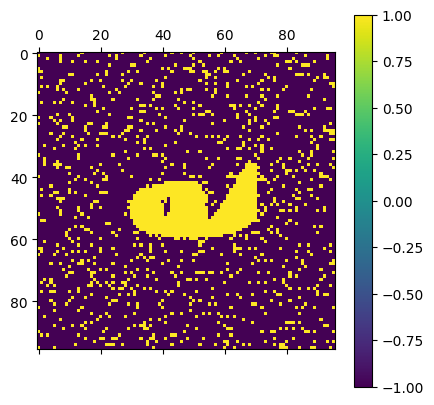

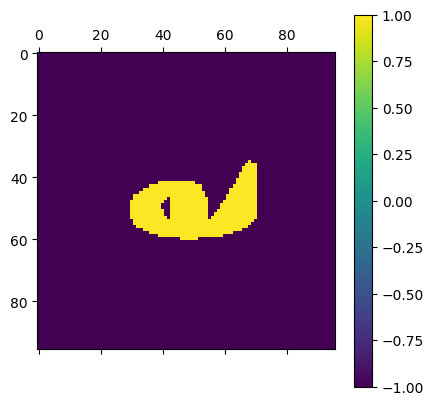

In [36]:
from pylab import *
from math import sqrt
import matplotlib.pyplot as plt
import os

# Define the path to the input image
IMAGE_PATH = "/content/noisy5.jpg"

def show(matrix):
    """
    Display a matrix in a formatted manner.

    Args:
        matrix (list of lists): The matrix to be displayed.
    """
    for j in range(len(matrix)):
        for i in range(len(matrix[0])):
            print("{:.3f}".format(matrix[j][i]), end=" ")
        print(sep="")

def change(vector, a, b):
    """
    Transform a vector into a matrix of specified dimensions.

    Args:
        vector (list): The vector to be transformed.
        a (int): The number of columns in the resulting matrix.
        b (int): The number of rows in the resulting matrix.

    Returns:
        list of lists: The transformed matrix.
    """
    matrix = [[0 for j in range(a)] for i in range(b)]
    k = 0
    j = 0
    while k < b:
        i = 0
        while i < a:
            matrix[k][i] = vector[j]
            j += 1
            i += 1
        k += 1
    return matrix

def product(matrix, vector, T):
    """
    Multiply a matrix by a vector.

    Args:
        matrix (list of lists): The matrix to be multiplied.
        vector (list): The vector to be multiplied.
        T (float): The threshold parameter for the activation function.

    Returns:
        list: The resulting vector after multiplication.
    """
    result_vector = []
    for i in range(len(matrix)):
        x = 0
        for j in range(len(vector)):
            x = x + matrix[i][j] * vector[j]
        result_vector.append((x + T))
    return result_vector

def action(vector, T, Emax):
    """
    Activation function to process a vector.

    Args:
        vector (list): The input vector to be processed.
        T (float): The threshold parameter for the activation function.
        Emax (float): The maximum allowable value for the difference in output vectors between consecutive iterations.

    Returns:
        list: The output vector after activation.
    """
    result_vector = []
    for value in vector:
        if value <= 0:
            result_vector.append(0)
        elif 0 < value <= T:
            result_vector.append(Emax * value)
        elif value > T:
            result_vector.append(T)
    return result_vector

def mysum(vector, j):
    """
    Calculate the sum of vector values excluding the element at index j.

    Args:
        vector (list): The input vector.
        j (int): The index of the element to be excluded from the sum.

    Returns:
        float: The sum of vector values with the element at index j excluded.
    """
    p = 0
    total_sum = 0
    while p < len(vector):
        if p != j:
            total_sum = total_sum + vector[p]
        p += 1
    return total_sum

def norm(vector, p):
    """
    Calculate the difference between two vectors and compute the norm of the resulting vector.

    Args:
        vector (list): The first vector.
        p (list): The second vector for subtraction.

    Returns:
        float: The Euclidean norm of the difference between the two vectors.
    """
    difference = []
    for i in range(len(vector)):
        difference.append(vector[i] - p[i])
    sum = 0
    for element in difference:
        sum += element * element
    return sqrt(sum)

# List of paths to example images
path = [
    '/content/1.jpg',
    '/content/2.jpg',
    '/content/3.jpg',
    '/content/4.jpg',
    '/content/5.jpg',
]

x = []  # Binary representations of example images
print(os.path.basename(IMAGE_PATH))

# Convert and store binary representations of example images
for i in path:
    x.append(convertImageToBinary(i))

y = convertImageToBinary(IMAGE_PATH)  # Binary representation of the input image
entr = y
k = len(x)  # Number of example images
a = 96  # Number of columns in the transformed matrix
b = 96  # Number of rows in the transformed matrix
entr = y
q = change(y, a, b)  # Transformation of the input image into a matrix
plt.matshow(q)
plt.colorbar()

m = len(x[0])
w = [[(x[i][j]) / 2 for j in range(m)] for i in range(k)]  # Weight matrix
T = m / 2  # Activation function threshold parameter
e = round(1 / len(x), 1)
E = [[0 for j in range(k)] for i in range(k)]  # Synaptic connection matrix
Emax = 0.000001  # Maximum allowable difference norm between output vectors in consecutive iterations
U = 1 / Emax

# Set values for the synaptic connection matrix
for i in range(k):
    for j in range(k):
        if j == i:
            E[i][j] = 1.0
        else:
            E[i][j] = -e

s = [product(w, y, T)]  # Initial output vector
p = action(s[0], U, Emax)
y = [p]
i = 0
j = []
p = [0 for j in range(len(s[0]))]

# Iterate until the difference norm is less than Emax
while norm(y[i], p) >= Emax:
    s.append([0 for j in range(len(s[0]))])
    for j in range(len(s[0])):
        s[i + 1][j] = y[i][j] - e * mysum(y[i], j)
    y.append((action(s[i + 1], U, Emax)))
    i += 1
    p = y[i - 1]

print('Output Vectors Table:')
for idx, output_vector in enumerate(y):
    print(f'Iteration {idx + 1}:', *output_vector)
    print('Weights (x, y):')
    for j in range(len(x[0])):
        print(f'x{j}: {w[0][j]:.3f}, y{j}: {w[1][j]:.3f}')
    print('Error:', norm(y[idx], p))
    print()

print('Last Output Vector:', *y[len(y) - 1])

# Determine the class with the highest output value
result_index = y[len(y) - 1].index(max(y[len(y) - 1])) + 1

if max(y[len(y) - 1]) == 0:
    print("The Hamming network cannot make a preference between classes.")
    print("In the case of a small number of input characteristics, the network may not be able to classify the image.")
    plt.show()
    exit()
else:
    q = change(x[result_index - 1], a, b)
    print('The highest positive output value is associated with class', result_index)
    plt.matshow(q)
    plt.colorbar()
    plt.show()


# **qwe**

Streaming output truncated to the last 5000 lines.
x4220: -0.500, y4220: -0.500
x4221: -0.500, y4221: -0.500
x4222: -0.500, y4222: -0.500
x4223: -0.500, y4223: -0.500
x4224: -0.500, y4224: -0.500
x4225: -0.500, y4225: -0.500
x4226: -0.500, y4226: -0.500
x4227: -0.500, y4227: -0.500
x4228: -0.500, y4228: -0.500
x4229: -0.500, y4229: -0.500
x4230: -0.500, y4230: -0.500
x4231: -0.500, y4231: -0.500
x4232: -0.500, y4232: -0.500
x4233: -0.500, y4233: -0.500
x4234: -0.500, y4234: -0.500
x4235: -0.500, y4235: -0.500
x4236: -0.500, y4236: -0.500
x4237: -0.500, y4237: -0.500
x4238: -0.500, y4238: -0.500
x4239: -0.500, y4239: -0.500
x4240: -0.500, y4240: -0.500
x4241: -0.500, y4241: -0.500
x4242: -0.500, y4242: -0.500
x4243: -0.500, y4243: -0.500
x4244: -0.500, y4244: -0.500
x4245: -0.500, y4245: -0.500
x4246: -0.500, y4246: -0.500
x4247: -0.500, y4247: -0.500
x4248: 0.500, y4248: -0.500
x4249: 0.500, y4249: -0.500
x4250: 0.500, y4250: -0.500
x4251: 0.500, y4251: -0.500
x4252: 0.500, y4252: -0.5

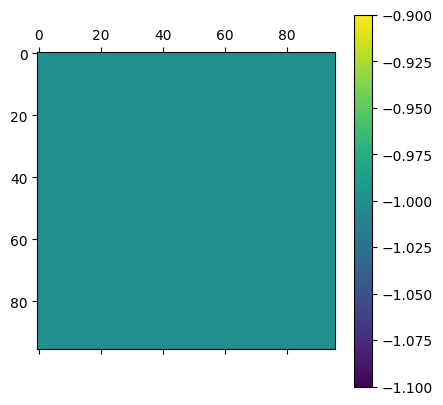

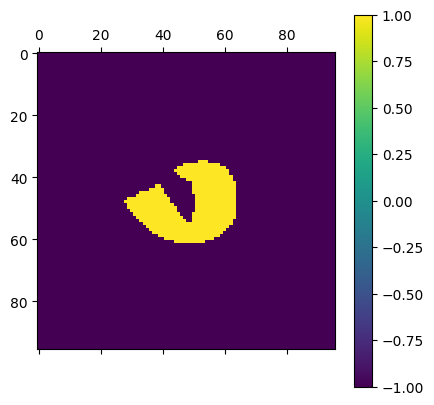

In [58]:
from pylab import *
from math import sqrt
import matplotlib.pyplot as plt
import os

# Define the path to the input image
IMAGE_PATH = "/content/missing_point1.jpg"

def show(matrix):
    """
    Display a matrix in a formatted manner.

    Args:
        matrix (list of lists): The matrix to be displayed.
    """
    for j in range(len(matrix)):
        for i in range(len(matrix[0])):
            print("{:.3f}".format(matrix[j][i]), end=" ")
        print(sep="")

def change(vector, a, b):
    """
    Transform a vector into a matrix of specified dimensions.

    Args:
        vector (list): The vector to be transformed.
        a (int): The number of columns in the resulting matrix.
        b (int): The number of rows in the resulting matrix.

    Returns:
        list of lists: The transformed matrix.
    """
    matrix = [[0 for j in range(a)] for i in range(b)]
    k = 0
    j = 0
    while k < b:
        i = 0
        while i < a:
            matrix[k][i] = vector[j]
            j += 1
            i += 1
        k += 1
    return matrix

def product(matrix, vector, T):
    """
    Multiply a matrix by a vector.

    Args:
        matrix (list of lists): The matrix to be multiplied.
        vector (list): The vector to be multiplied.
        T (float): The threshold parameter for the activation function.

    Returns:
        list: The resulting vector after multiplication.
    """
    result_vector = []
    for i in range(len(matrix)):
        x = 0
        for j in range(len(vector)):
            x = x + matrix[i][j] * vector[j]
        result_vector.append((x + T))
    return result_vector

def action(vector, T, Emax):
    """
    Activation function to process a vector.

    Args:
        vector (list): The input vector to be processed.
        T (float): The threshold parameter for the activation function.
        Emax (float): The maximum allowable value for the difference in output vectors between consecutive iterations.

    Returns:
        list: The output vector after activation.
    """
    result_vector = []
    for value in vector:
        if value <= 0:
            result_vector.append(0)
        elif 0 < value <= T:
            result_vector.append(Emax * value)
        elif value > T:
            result_vector.append(T)
    return result_vector

def mysum(vector, j):
    """
    Calculate the sum of vector values excluding the element at index j.

    Args:
        vector (list): The input vector.
        j (int): The index of the element to be excluded from the sum.

    Returns:
        float: The sum of vector values with the element at index j excluded.
    """
    p = 0
    total_sum = 0
    while p < len(vector):
        if p != j:
            total_sum = total_sum + vector[p]
        p += 1
    return total_sum

def norm(vector, p):
    """
    Calculate the difference between two vectors and compute the norm of the resulting vector.

    Args:
        vector (list): The first vector.
        p (list): The second vector for subtraction.

    Returns:
        float: The Euclidean norm of the difference between the two vectors.
    """
    difference = []
    for i in range(len(vector)):
        difference.append(vector[i] - p[i])
    sum = 0
    for element in difference:
        sum += element * element
    return sqrt(sum)

# List of paths to example images
path = [
    '/content/1.jpg',
    '/content/2.jpg',
    '/content/3.jpg',
    '/content/4.jpg',
    '/content/5.jpg',
]

x = []  # Binary representations of example images
print(os.path.basename(IMAGE_PATH))

# Convert and store binary representations of example images
for i in path:
    x.append(convertImageToBinary(i))

y = convertImageToBinary(IMAGE_PATH)  # Binary representation of the input image
entr = y
k = len(x)  # Number of example images
a = 96  # Number of columns in the transformed matrix
b = 96  # Number of rows in the transformed matrix
entr = y
q = change(y, a, b)  # Transformation of the input image into a matrix
plt.matshow(q)
plt.colorbar()

m = len(x[0])
w = [[(x[i][j]) / 2 for j in range(m)] for i in range(k)]  # Weight matrix
T = m / 2  # Activation function threshold parameter
e = round(1 / len(x), 1)
E = [[0 for j in range(k)] for i in range(k)]  # Synaptic connection matrix
Emax = 0.000001  # Maximum allowable difference norm between output vectors in consecutive iterations
U = 1 / Emax

# Set values for the synaptic connection matrix
for i in range(k):
    for j in range(k):
        if j == i:
            E[i][j] = 1.0
        else:
            E[i][j] = -e

s = [product(w, y, T)]  # Initial output vector
p = action(s[0], U, Emax)
y = [p]
i = 0
j = []
p = [0 for j in range(len(s[0]))]

# Iterate until the difference norm is less than Emax
while norm(y[i], p) >= Emax:
    s.append([0 for j in range(len(s[0]))])
    for j in range(len(s[0])):
        s[i + 1][j] = y[i][j] - e * mysum(y[i], j)
    y.append((action(s[i + 1], U, Emax)))
    i += 1
    p = y[i - 1]

print('Output Vectors Table:')
for idx, output_vector in enumerate(y):
    print(f'Iteration {idx + 1}:', *output_vector)
    print('Weights (x, y):')
    for j in range(len(x[0])):
        print(f'x{j}: {w[0][j]:.3f}, y{j}: {w[1][j]:.3f}')
    print('Error:', norm(y[idx], p))
    print()

print('Last Output Vector:', *y[len(y) - 1])

# Determine the class with the highest output value
result_index = y[len(y) - 1].index(max(y[len(y) - 1])) + 1

if max(y[len(y) - 1]) == 0:
    print("The Hamming network cannot make a preference between classes.")
    print("In the case of a small number of input characteristics, the network may not be able to classify the image.")
    plt.show()
    exit()
else:
    q = change(x[result_index - 1], a, b)
    print('The highest positive output value is associated with class', result_index)
    plt.matshow(q)
    plt.colorbar()
    plt.show()

# **Q4**

In [122]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1C-AVE55fDoa-cthv3nbEBJP5p7T9I_vF

Downloading...
From: https://drive.google.com/uc?id=1C-AVE55fDoa-cthv3nbEBJP5p7T9I_vF
To: /content/Q4miniP2.csv
100% 473k/473k [00:00<00:00, 108MB/s]


In [138]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Dense

import warnings

In [141]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/Q4miniP2.csv')

waterfront= data[['waterfront']].values
view= data[['view']].values
condition= data[['condition']].values
sqft_basement= data[['sqft_basement']].values
yr_renovated= data[['yr_renovated']].values


# Separate features and target
#X = data.iloc[:, :-1].values
#y = data.iloc[:, -1].values

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [70]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/Q4miniP2.csv')

# Display the number of NaN values in each column
nan_counts = data.isna().sum()
print(nan_counts)


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/Q4miniP2.csv')

correlation_matrix = data.corr()['price'].sort_values(ascending=False)
correlation_matrix


<ipython-input-75-8399a1d1516f>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()['price'].sort_values(ascending=False)


price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64

<ipython-input-83-09b8dab3e75d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="RdYlGn")


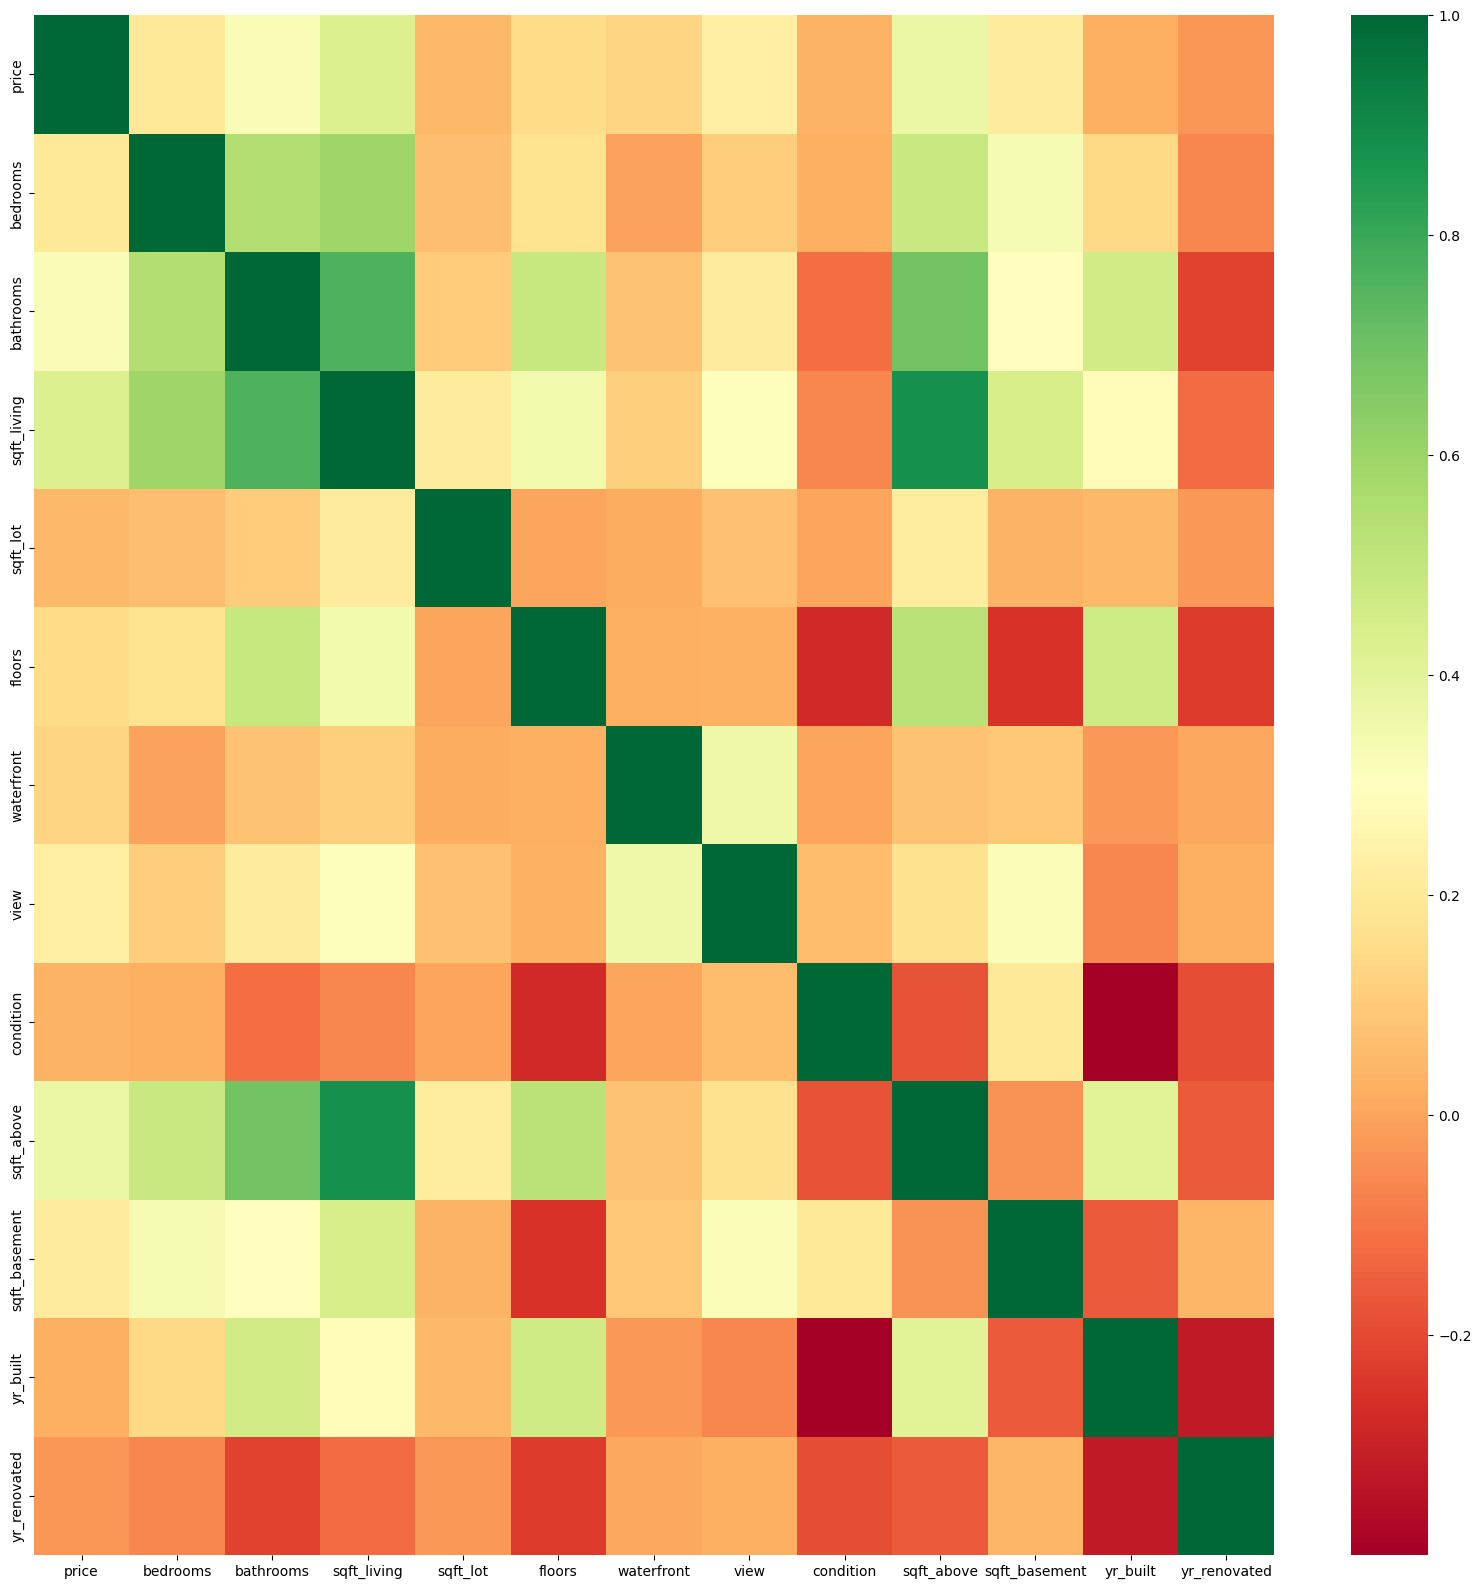

In [83]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Create a heatmap using seaborn
sns.heatmap(data.corr(), cmap="RdYlGn")

# Show the plot
plt.show()

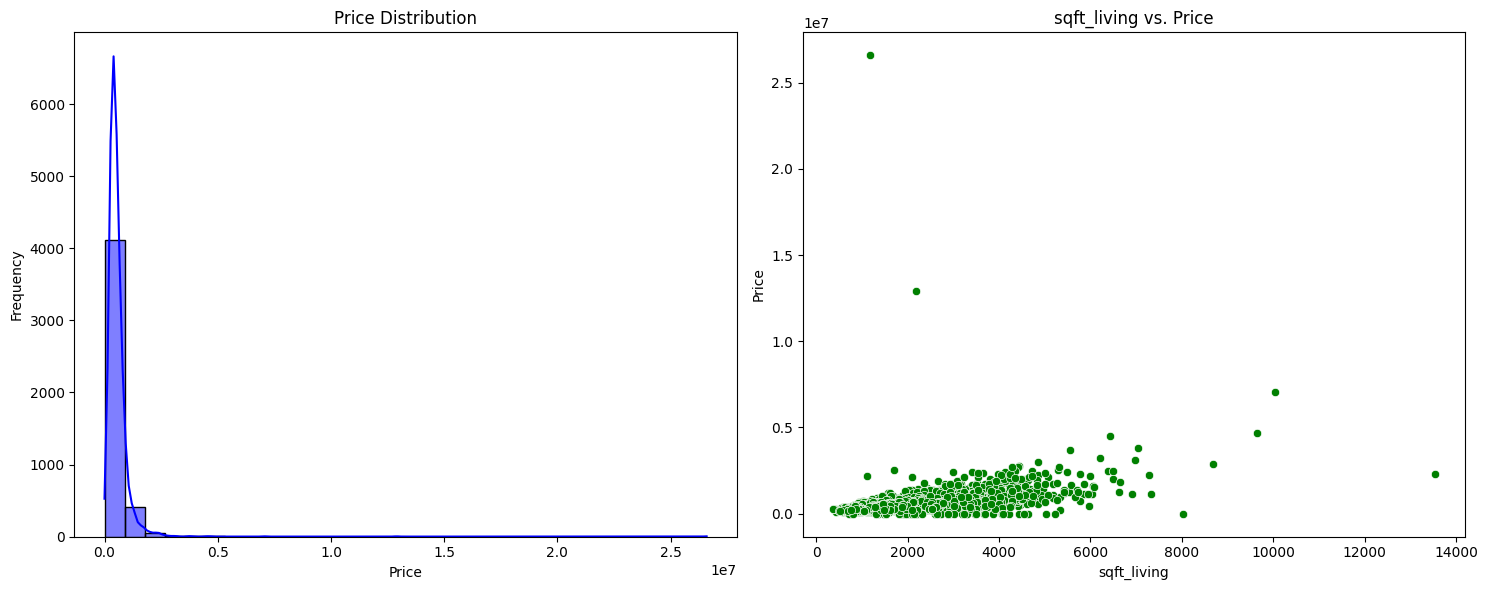

In [139]:
plt.figure(figsize=(15, 6))

# Subplot 1: Price Distribution Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['price'], bins=30, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Subplot 2: Scatter plot of sqft_living vs. Price
plt.subplot(1, 2, 2)
sns.scatterplot(x='sqft_living', y='price', data=data, color='green')
plt.title('sqft_living vs. Price')
plt.xlabel('sqft_living')
plt.ylabel('Price')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [142]:
# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Extract 'month' and 'year' columns
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

# Drop the original 'date' column
data = data.drop('date', axis=1)

# Display the modified DataFrame
print(data.head())
# Display only the 'month' and 'year' columns
print(data[['month', 'year']].head())

       price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   313000.0         3       1.50         1340      7912     1.5           0   
1  2384000.0         5       2.50         3650      9050     2.0           0   
2   342000.0         3       2.00         1930     11947     1.0           0   
3   420000.0         3       2.25         2000      8030     1.0           0   
4   550000.0         4       2.50         1940     10500     1.0           0   

   view  condition  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3        1340              0      1955          2005   
1     4          5        3370            280      1921             0   
2     0          4        1930              0      1966             0   
3     0          4        1000           1000      1963             0   
4     0          4        1140            800      1976          1992   

                     street       city  statezip country  month  year  
0      1

In [144]:
# Initialize LabelEncoder
l1 = LabelEncoder()

# Convert object-type columns to numerical using Label Encoding
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = l1.fit_transform(data[i])


# Separate input (X) and output (Y) data
X = data.drop(["price"], axis=1)  # Input data
Y = data["price"]                  # Output data


# Perform train-test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=23)


# Print the shapes of the datasets
print("X Train Scaler : ", x_train.shape) # Print shape of x_train
print("X Test Scaler : ",  x_test.shape)  # Print shape of x_test
print("Y Train Scaler : ", y_train.shape) # Print shape of y_train
print("Y Test Scaler : ",  y_test.shape)  # Print shape of y_test


X Train Scaler :  (3680, 18)
X Test Scaler :  (920, 18)
Y Train Scaler :  (3680,)
Y Test Scaler :  (920,)


In [145]:
# Find the maximum value in y_train data
max_1 = y_train.values
maximum = 0
minimum = min(y_train)

# Loop through the elements of y_train
for i in range(x_train.shape[0]):
    if max_1[i] > maximum:
        maximum = max_1[i]

# Initialize Min-Max Scaler
scaler_1 = MinMaxScaler()

# Normalize the training input data
x_train = scaler_1.fit_transform(x_train)

# Normalize the test input data
x_test = scaler_1.transform(x_test)


# Convert y_train and y_test type to DataFrame
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

scaler_2 = MinMaxScaler()

# Normalize outputs
y_train = scaler_2.fit_transform(y_train)
y_test = scaler_2.transform(y_test)

# **MLP 2 Layers**

In [151]:
model_2 = Sequential()

# Add the first hidden layer with 50 neurons and linear activation function
model_2.add(Dense(50, activation='linear', input_shape=(x_train.shape[1],)))

# Add the second hidden layer with 30 neurons and linear activation function
model_2.add(Dense(30, activation='linear'))

# Add an output layer with 1 neuron and linear activation function
model_2.add(Dense(1, activation='linear'))

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                950       
                                                                 
 dense_4 (Dense)             (None, 30)                1530      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 2511 (9.81 KB)
Trainable params: 2511 (9.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [154]:
model_2.compile(optimizer='adam', loss='mse')

history = model_2.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10)

In [155]:
#Evaluate the model
loss = model_2.evaluate(x_test , y_test)

29/29 [==============================] - 0s 2ms/step - loss: 0.1071


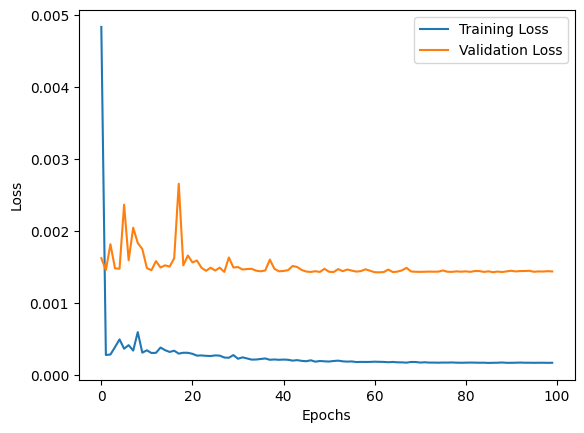

In [156]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')   # Training loss
plt.plot(history.history['val_loss'], label='val')  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

29/29 [==============================] - 0s 2ms/step


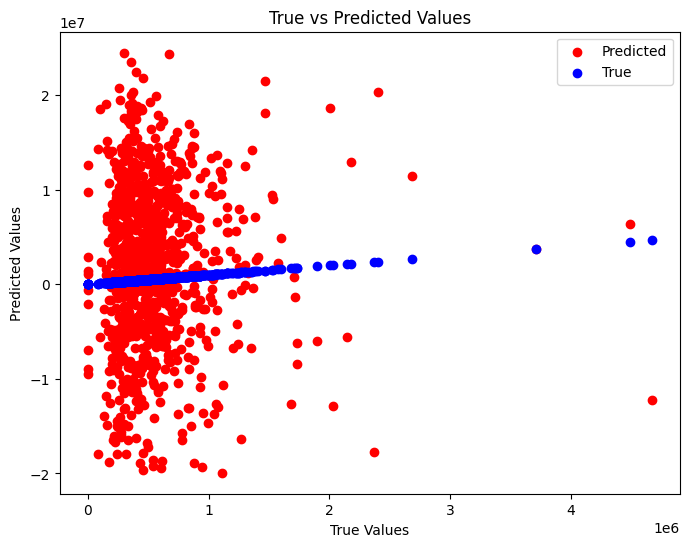

In [159]:
y_pred_1 = model_2.predict(x_test)
rscore_1 = r2_score(y_test, y_pred_1)

rscore_1

import matplotlib.pyplot as plt

# Inverse transform the scaled test data and predictions
y_test_unscaled = scaler_2.inverse_transform(y_test)
y_pred_unscaled = scaler_2.inverse_transform(y_pred_1)

# Plotting the unscaled true test data against predictions with different colors
plt.figure(figsize=(8, 6))
plt.scatter(y_test_unscaled, y_pred_unscaled, color='red', label='Predicted')
plt.scatter(y_test_unscaled, y_test_unscaled, color='blue', label='True')
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# **Q5**

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB
None

Summary statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.

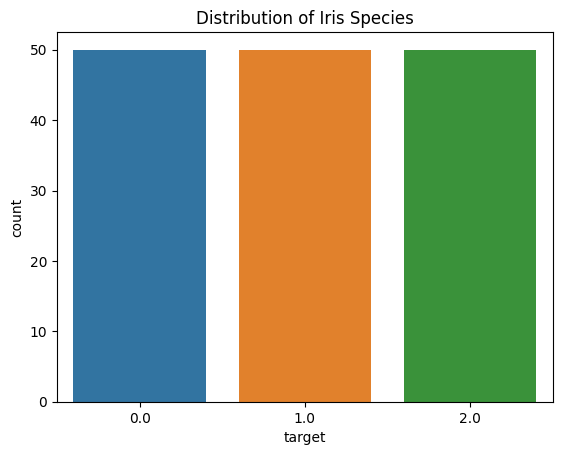

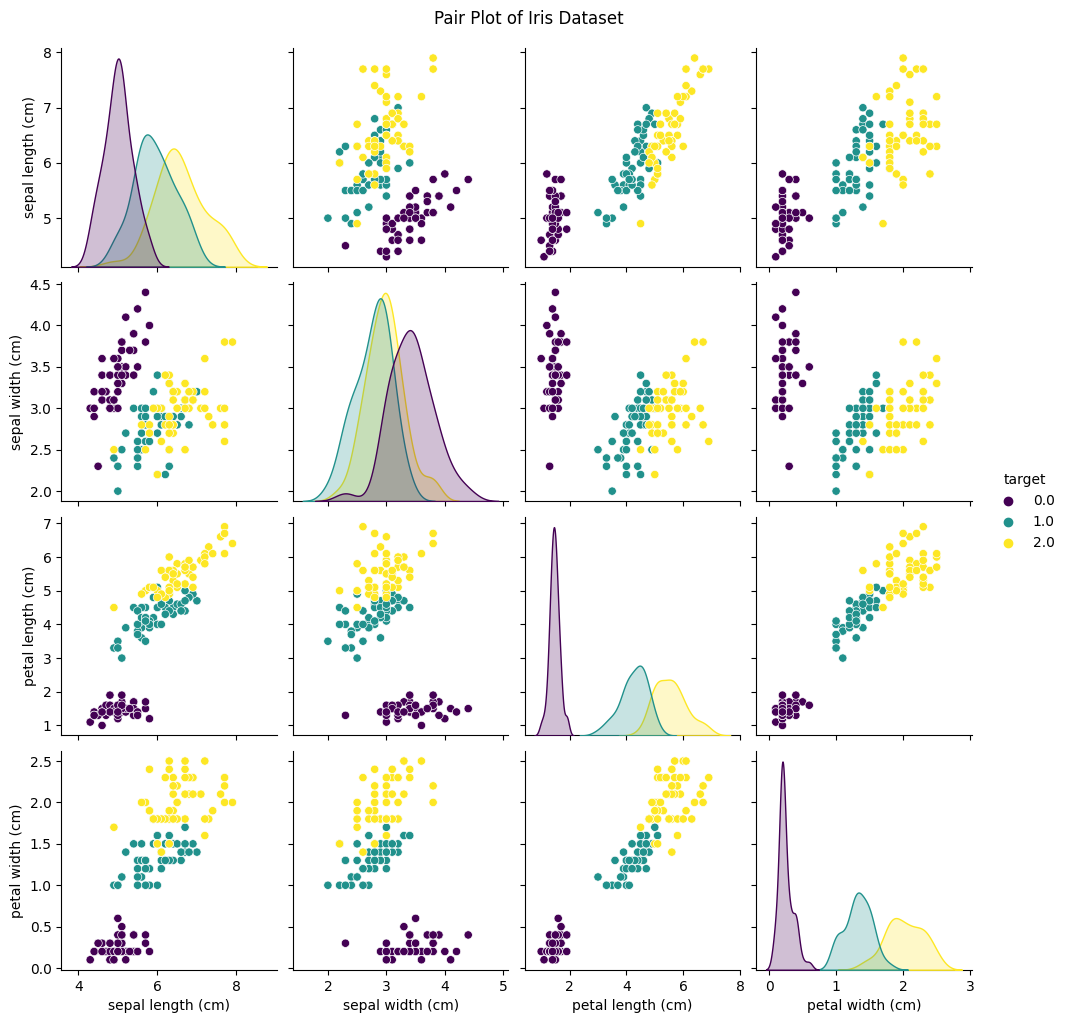

In [162]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the Iris dataset
iris = load_iris()

# Convert the data to a DataFrame
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                       columns=iris['feature_names'] + ['target'])

# Display basic information about the dataset
print("Dataset information:")
print(iris_df.info())

# Display summary statistics of the dataset
print("\nSummary statistics:")
print(iris_df.describe())

# Visualize the distribution of the target variable
sns.countplot(x='target', data=iris_df)
plt.title("Distribution of Iris Species")
plt.show()

# Visualize pair plots to explore relationships between features
sns.pairplot(iris_df, hue='target', palette='viridis')
plt.suptitle("Pair Plot of Iris Dataset", y=1.02)
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=23)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a simple logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# **MLP**

In [179]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam',
                      alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001,
                      power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False,
                      warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1,
                      beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)


model = MLPClassifier(hidden_layer_sizes=(20, 10, 2), random_state=23, verbose=True,
                      max_iter=250, learning_rate_init=0.001)

model.fit(X_train, y_train)
model.score(X_test, y_test)

Iteration 1, loss = 1.61245345
Iteration 2, loss = 1.60228484
Iteration 3, loss = 1.59265077
Iteration 4, loss = 1.58344165
Iteration 5, loss = 1.57449572
Iteration 6, loss = 1.56579835
Iteration 7, loss = 1.55733048
Iteration 8, loss = 1.54907063
Iteration 9, loss = 1.54099595
Iteration 10, loss = 1.53308005
Iteration 11, loss = 1.52530443
Iteration 12, loss = 1.51764751
Iteration 13, loss = 1.51008650
Iteration 14, loss = 1.50260882
Iteration 15, loss = 1.49519957
Iteration 16, loss = 1.48784115
Iteration 17, loss = 1.48052576
Iteration 18, loss = 1.47324806
Iteration 19, loss = 1.46598651
Iteration 20, loss = 1.45874195
Iteration 21, loss = 1.45150534
Iteration 22, loss = 1.44427237
Iteration 23, loss = 1.43704397
Iteration 24, loss = 1.42981776
Iteration 25, loss = 1.42258945
Iteration 26, loss = 1.41534102
Iteration 27, loss = 1.40808100
Iteration 28, loss = 1.40085721
Iteration 29, loss = 1.39363018
Iteration 30, loss = 1.38647128
Iteration 31, loss = 1.37938857
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


1.0

# **Evaluate**

Accuracy: 0.9666666666666667
Precision: 0.9703703703703703
Recall: 0.9666666666666667
F1 Score: 0.9667698658410733


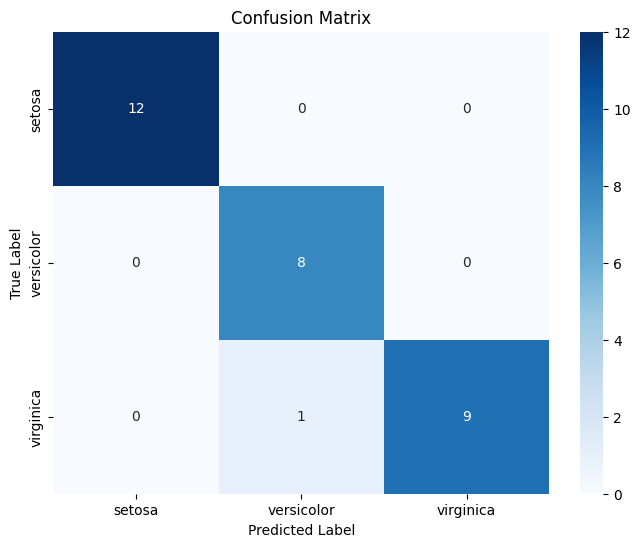

In [180]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model on the test data
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# **LogisticRegression**

In [181]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Create a Logistic Regression model
model = LogisticRegression(random_state=23)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Evaluate**

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


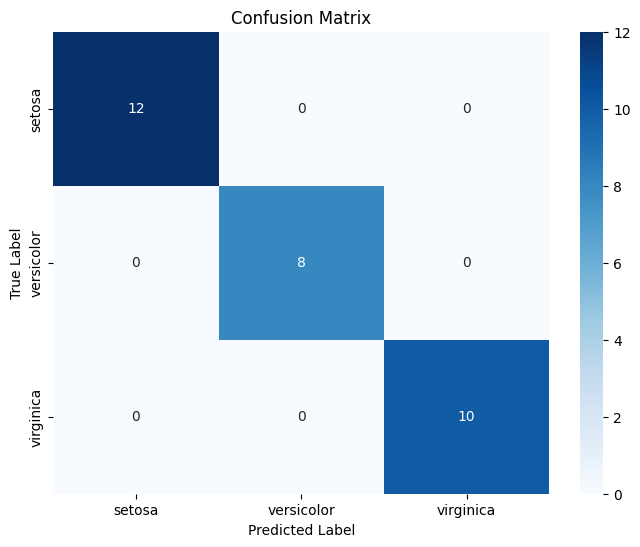

In [182]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model on the test data
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# **RBF**

In [183]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Create an SVM model with RBF kernel
model = SVC(kernel='rbf', random_state=23)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9666666666666667


# **Evaluate**

Accuracy: 0.9666666666666667
Precision: 0.9703703703703703
Recall: 0.9666666666666667
F1 Score: 0.9667698658410733


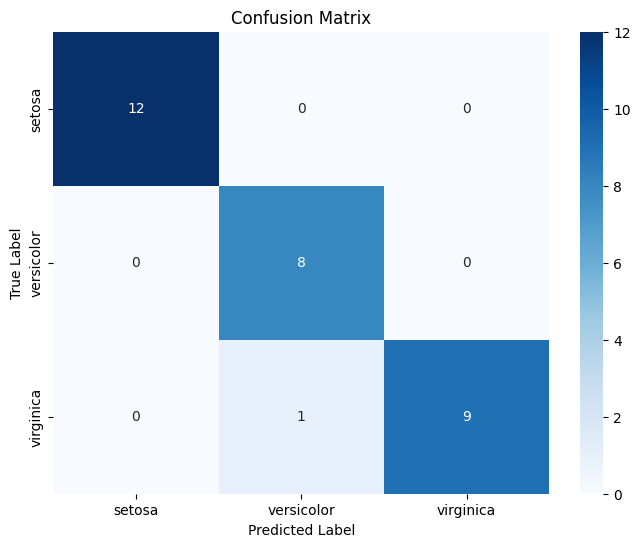

In [184]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model on the test data
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()